In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# 1. Import 

In [38]:
from pykrx import Krx
krx = Krx()
df = krx.get_market_ohlcv("20180310", "20190310", "187790")

# 2. Nano 일별 데이터

In [49]:
df.index = pd.to_datetime(df.index)

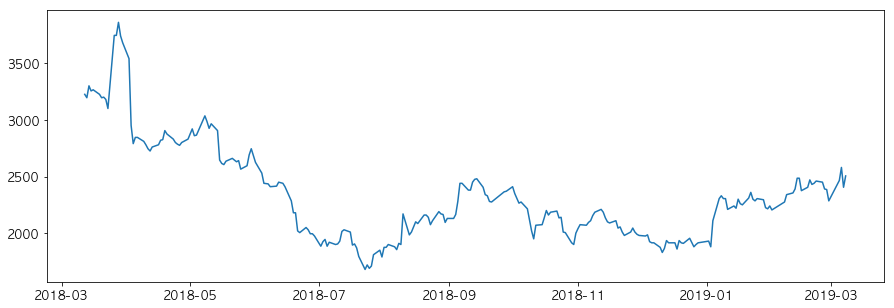

In [50]:
plt.figure(figsize=(15,5))
plt.plot(df['종가'])
plt.show()

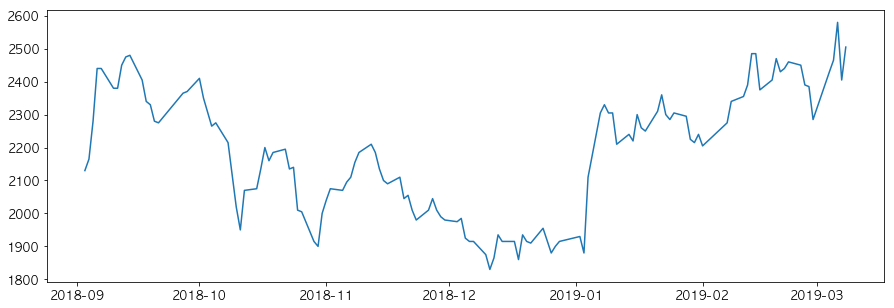

In [51]:
plt.figure(figsize=(15,5))
plt.plot(df['2018-09-01':]['종가'])
plt.show()

In [52]:
df['전일종가'] = df['종가'].shift(1)

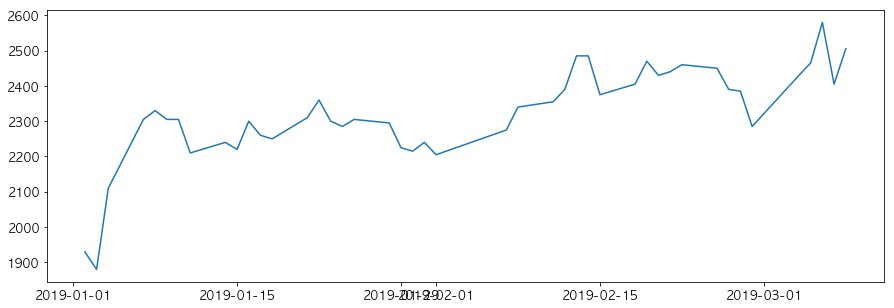

In [54]:
plt.figure(figsize=(15,5))
plt.plot(df['2019-01-01':]['종가'])
plt.show()

# 3. 나노 분별데이터

In [22]:
import os
import datetime as dt

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15,5)

In [35]:
codes = ['187790']
base_path = os.path.dirname(os.path.abspath('../..'))
data_path = os.path.join(base_path, 'data')
stock_path = os.path.join(data_path, 'stock')

result_path = os.path.join(base_path, 'result')
nano_path = os.path.join(result_path, '1.나노')
codes_path = os.path.join(stock_path, '분별매매가격_미세먼지')

In [24]:
codes

['187790']

In [31]:
data = {}
for code in codes:
    if '.' in code or code == '121800':
        continue
    code_path = os.path.join(codes_path, code)
    files = os.listdir(code_path)
    data[code.split('.')[0]] = {}
    
    for file in files:
        file_path = os.path.join(code_path, file)
        df = pd.read_csv(file_path, engine='python')
        df['체결시각'] = pd.to_datetime(df['체결시각'])
        df['이전체결가'] = df['체결가'].shift(1)
        df['체결가-이전체결가'] = df['체결가'] - df['이전체결가']
        df['7분이동평균'] = df['체결가'].rolling(window=7).mean()
        df['7분-이전이동평균'] = df['7분이동평균'] - df['7분이동평균'].shift(1)
        df.set_index('체결시각', inplace=True)
        data[code.split('.')[0]][file.split('.')[0]] = df.copy()

In [32]:
name_dict = {}
for code in codes:
    if '.' in code or code == '121800':
        continue
    name_dict[code]= None

name_dict['187790'] = '나노'

In [33]:
from time import sleep
from matplotlib.dates import HourLocator, DateFormatter, MinuteLocator

days = ['0225', '0226', '0227', '0228', '0304', '0305', '0306', '0307', '0308']
days_index = ['02-25', '02-26', '02-27', '02-28', '03-04', '03-05', '03-06', '03-07', '03-08']

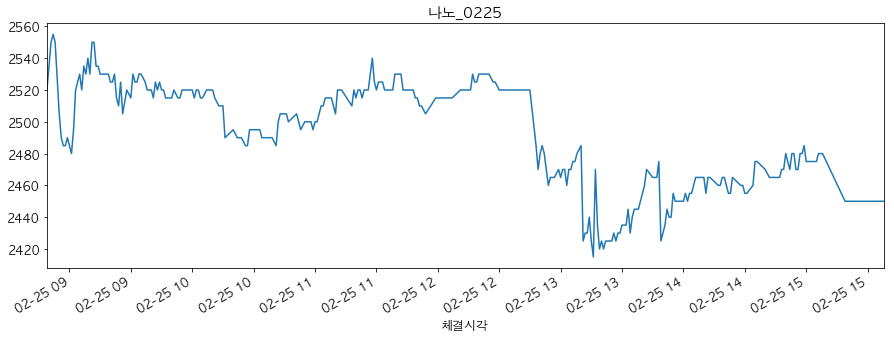

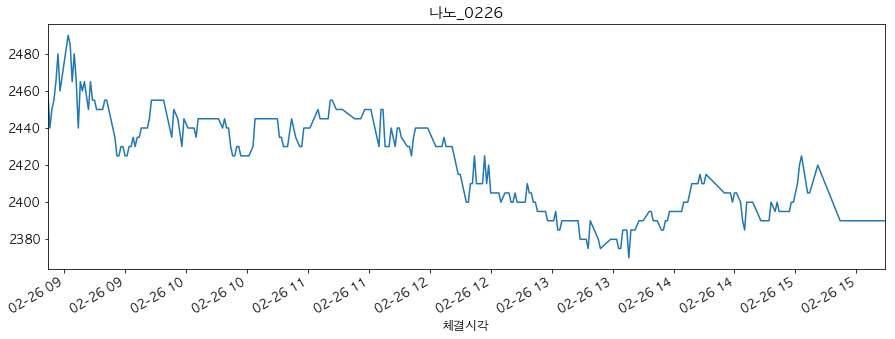

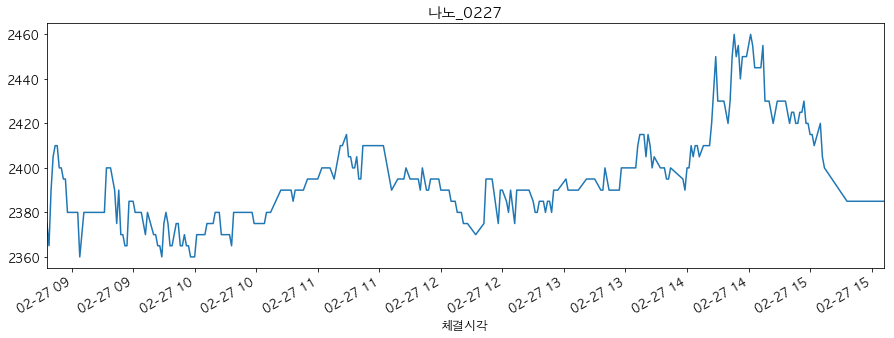

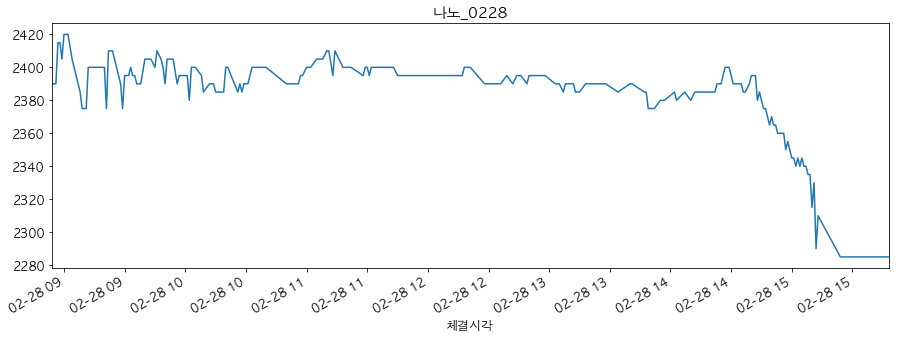

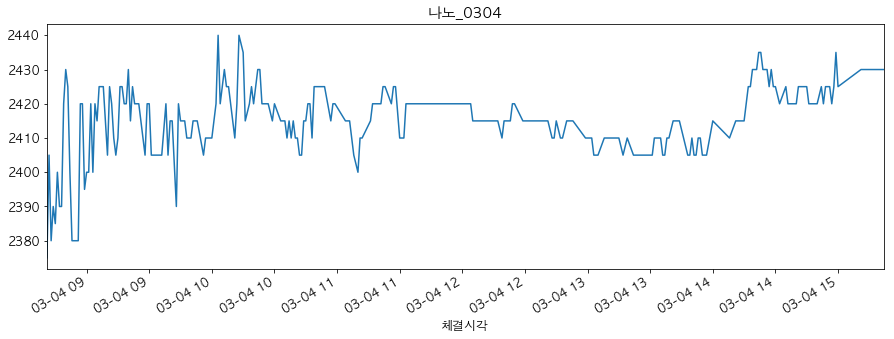

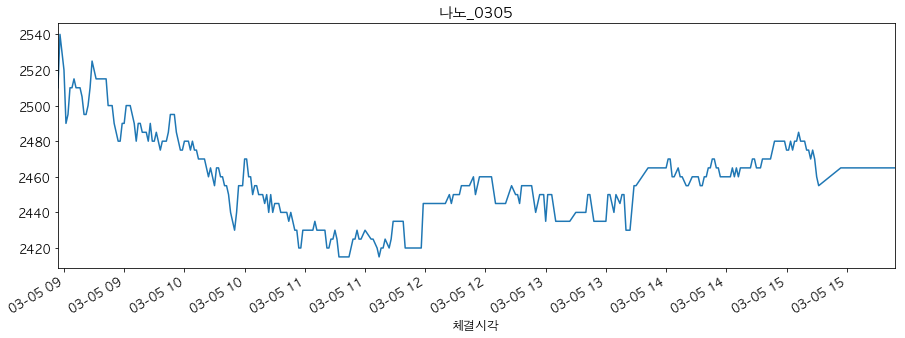

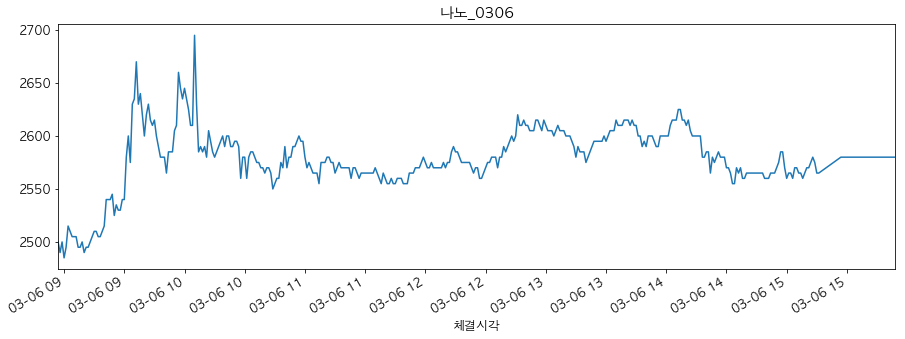

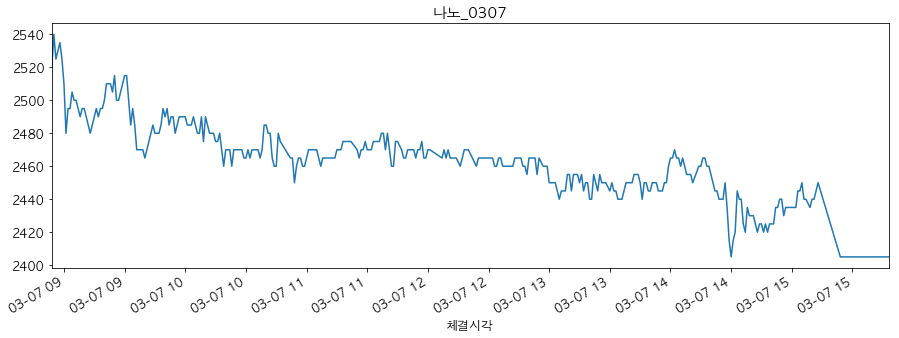

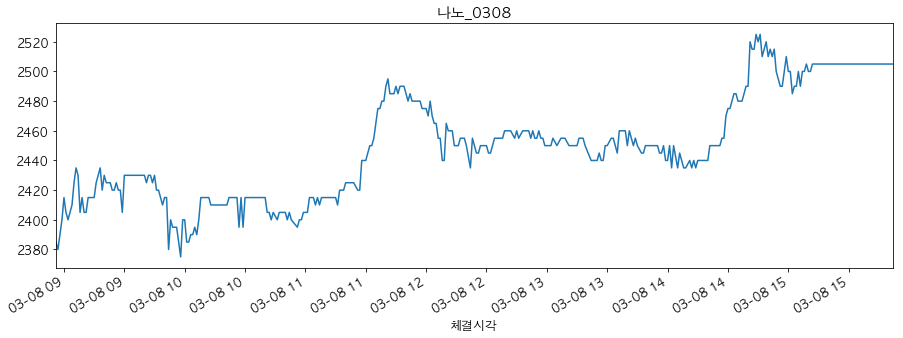

In [36]:
for code in codes:
    for i, day in enumerate(days):
        start_time = pd.to_datetime('2019-'+days_index[i]+' 09:00:00')
        end_time = pd.to_datetime('2019-'+days_index[i]+ ' 16:30:00')
        ax = data[code][day]['체결가'][start_time: end_time].plot()
        ax.xaxis.set_major_locator(MinuteLocator(interval=30))
        #ax.xaxis.set_major_formatter(DateFormatter('%M'))
        plt.title(name_dict[code] + "_" + day)
        plt.savefig(os.path.join(nano_path, name_dict[code] + "_" + day + ".png"))
        plt.show()
        del ax
        sleep(0.5)

### 반드시 그런 것은 아니겠지만 시가와 12시를 비교하면 대략적으로 상승 여부를 파악할 수 있다.